<a href="https://colab.research.google.com/github/O-keita/LearnSight/blob/main/notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Optimization Techniques in Machine Learning

Objective: This assignment aims to explore implementation or Machine Learning Models with regularization, optimization and Error analysis  techniques used in machine learning to improve models' performance, convergence speed, and efficiency..

A Notebook detailing the following

* Project name
* Clear out puts from cells






**Instructions**

1. Acquire a dataset suitable for ML tasks as per your proposal.
2. Implement a simple machine learning model based on neural networks on the chosen dataset without any defined optimization techniques. (Check instructions)
3. Implement and compare the model's performance after applying 3 to 4 disntict combinations regularization and optimization techniques.
4. Discuss the results on the README file.
5. Make predictions using test data
7. Implement error analysis techniques and ensure there is: F1-Score, Recall, Precision, RUC a confusion matrix using plotting libraries (not verbose)

Submit notebook to github repo




# Case Study and Implementation




In [47]:
#Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import joblib
import os
import tensorflow as tf
from tensorflow.keras import Sequential, regularizers, optimizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.models import load_model



## 📚 The Dataset  
> ***Brief Description:***

### 🎯 Problem Statement  
Students often require targeted academic support, but identifying who needs help—and to what extent—is challenging without early data-driven insights.  
This project aims to use machine learning to classify students into **High Achiever**, **Average**, or **At-Risk** categories based on their performance and background, enabling early intervention.

### 📊 Dataset Overview  
The dataset used is the **"Students Performance in Exams"** from Kaggle, consisting of **1,000 student records**.  
Each record includes demographic features (e.g., gender, parental education), test preparation status, and scores in **math**, **reading**, and **writing**.  
These features are used to engineer a custom target variable: `support_category`, which reflects overall academic performance and guides classification.


In [48]:
df = pd.read_csv('/content/StudentsPerformance.csv')
df.head(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [49]:

df['average_score'] = df[['math score', 'reading score', 'writing score']].mean(axis=1)

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [50]:

def assign_support_category(score):
    if score >= df['average_score'].quantile(0.7):  # Top 30% - High Achiever
        return 'High Achiever'
    elif score >= df['average_score'].quantile(0.3):  # Middle 40% - Average
        return 'Average'
    else:  # Bottom 30% - At-Risk
        return 'At-Risk'

# Apply the function to create the 'support_category' column
df['support_category'] = df['average_score'].apply(assign_support_category)


df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average_score,support_category
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,Average
1,female,group C,some college,standard,completed,69,90,88,82.333333,High Achiever
2,female,group B,master's degree,standard,none,90,95,93,92.666667,High Achiever
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,At-Risk
4,male,group C,some college,standard,none,76,78,75,76.333333,High Achiever


Text(0.5, 1.0, 'Distribution of Student Support Categories')

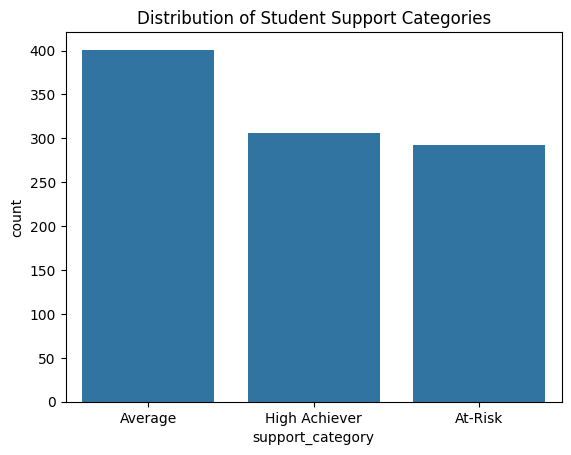

In [51]:
sns.countplot(x='support_category', data=df)
plt.title("Distribution of Student Support Categories")


Text(0.5, 1.0, 'Math Score Distribution by Gender')

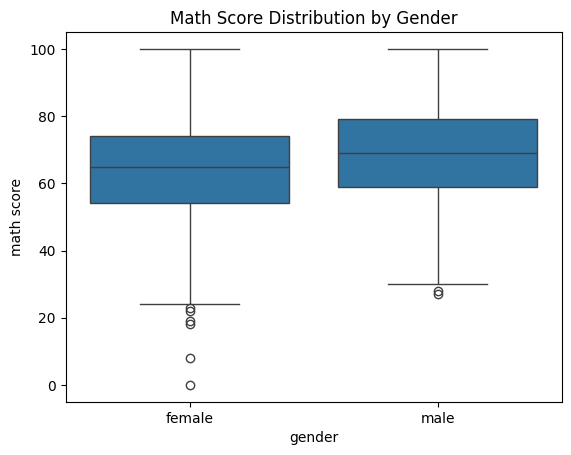

In [52]:
sns.boxplot(x='gender', y='math score', data=df)
plt.title("Math Score Distribution by Gender")


<Axes: >

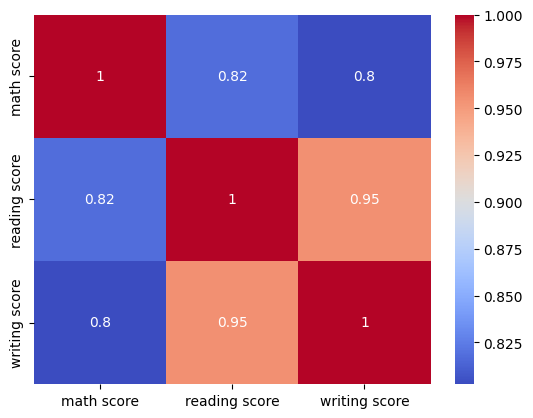

In [53]:
corr = df[['math score', 'reading score', 'writing score']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')


Text(0.5, 1.0, 'Average Scores by Parental Education Level')

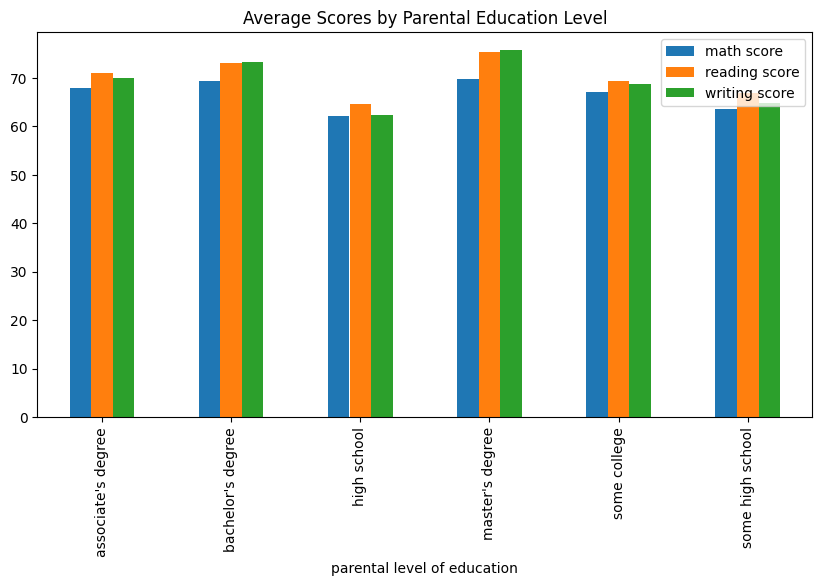

In [54]:
avg_scores = df.groupby('parental level of education')[['math score', 'reading score', 'writing score']].mean()
avg_scores.plot(kind='bar', figsize=(10, 5))
plt.title("Average Scores by Parental Education Level")


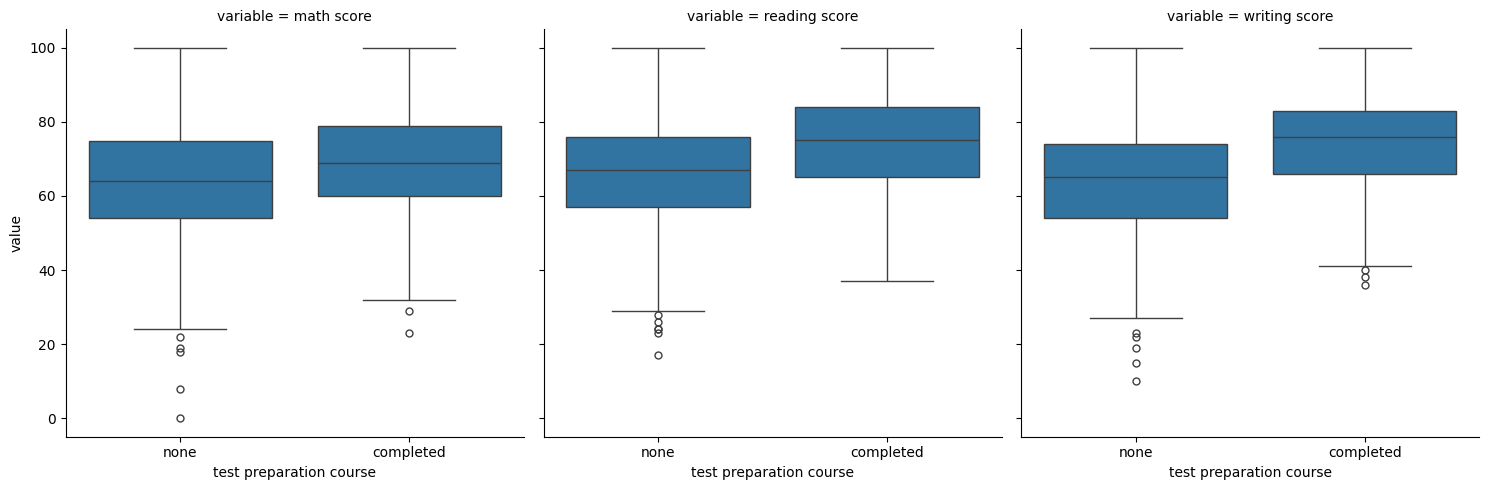

In [55]:
sns.catplot(data=df.melt(id_vars=['test preparation course'],
                         value_vars=['math score', 'reading score', 'writing score']),
            x='test preparation course', y='value', col='variable', kind='box')


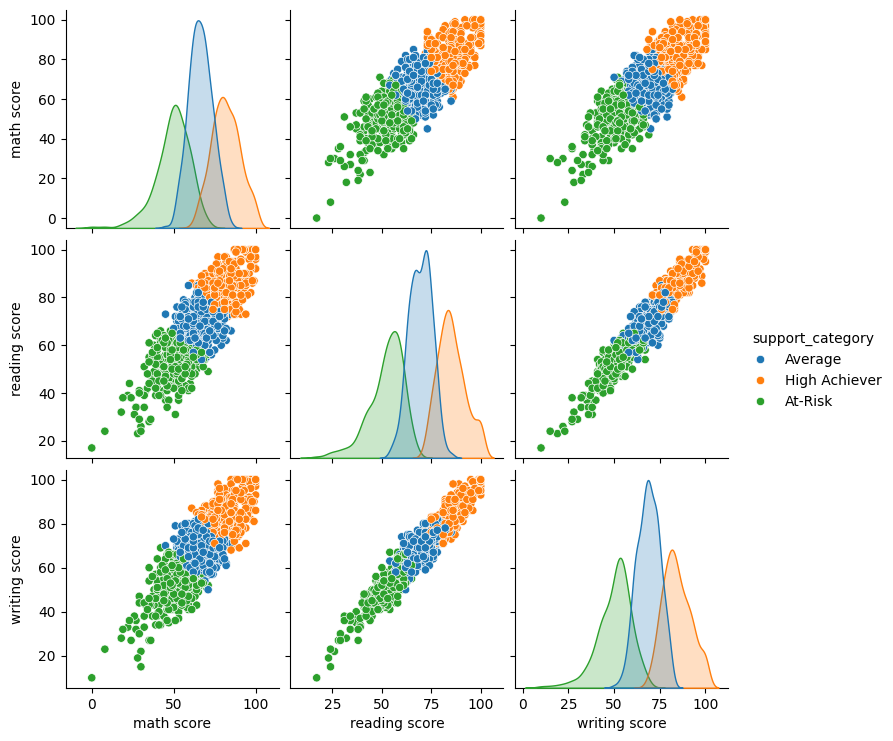

In [56]:
sns.pairplot(df, vars=['math score', 'reading score', 'writing score'], hue='support_category')


# Preprocess

In [57]:
le = LabelEncoder()
df['support_category'] = le.fit_transform(df['support_category'])
df['gender'] = le.fit_transform(df['gender'])
df['lunch'] = le.fit_transform(df['lunch'])
df['test preparation course'] = le.fit_transform(df['test preparation course'])

#One-hot for multiclass
df = pd.get_dummies(df, columns=['race/ethnicity', 'parental level of education'], drop_first=True)



In [58]:
df.head()

,gender,lunch,test preparation course,math score,reading score,writing score,average_score,support_category,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,0,1,1,72,72,74,72.666667,1,True,False,False,False,True,False,False,False,False
1,0,1,0,69,90,88,82.333333,2,False,True,False,False,False,False,False,True,False
2,0,1,1,90,95,93,92.666667,2,True,False,False,False,False,False,True,False,False
3,1,0,1,47,57,44,49.333333,0,False,False,False,False,False,False,False,False,False
4,1,1,1,76,78,75,76.333333,2,False,True,False,False,False,False,False,True,False


# Features Selection

In [59]:
X = df.drop(columns=['average_score', 'support_category']) #average_score is redundant

y = df.support_category
y.head()

,support_category
0,1
1,2
2,2
3,0
4,2


In [60]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.6, random_state=42)
X_test, X_valid, y_test, y_valid = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [61]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression

In [62]:
logreg = LogisticRegression(max_iter=200)
logreg.fit(X_train_scaled, y_train)
logreg_preds = logreg.predict(X_val_scaled)
os.makedirs("saved_models", exist_ok=True)
joblib.dump(logreg, 'saved_models/logreg.pkl')


['saved_models/logreg.pkl']

# SVM

In [63]:
svm = SVC(kernel='rbf', probability=True)
svm.fit(X_train_scaled, y_train)
svm_preds = svm.predict(X_val_scaled)
joblib.dump(svm, 'saved_models/svm.pkl')



['saved_models/svm.pkl']

In [64]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_valid)
joblib.dump(xgb, 'saved_models/xgb.pkl')



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:02:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


['saved_models/xgb.pkl']

# Neural Network



SECTION 1: Model Architecture

##Layer Breakdown (from left to right):

**Input Layer**:This layer contains 15 nodes, each representing a feature such as gender, test scores, lunch type, parental education level, and other student-related attributes.

**Hidden Layer 1**:A fully connected dense layer with 32 neurons, using the ReLU activation function. It identifies key relationships in the input data.

**Hidden Layer 2**:A dense layer with 16 neurons and ReLU activation. It deepens the model's understanding by learning more abstract representations.

**Hidden Layer 3**:A dense layer with 8 neurons, also using ReLU activation. This layer refines the learned features before final classification.

**Output Layer**:A softmax output layer with 3 neurons, each representing one of the classification categories:

- High Achiever

- Average

- At-Risk

The softmax function transforms the outputs into probabilities across the three classes.










#Task: Define a function that creates models without and With specified Optimization techniques


In [65]:
def define_model(model_type: str,
                 input_dim: int,
                 optimizer_name: str = "adam",
                 learning_rate: float = 0.001,
                 dropout_rate: float = 0.0,
                 regularization_value: float = None,
                 use_early_stopping: bool = False,
                 X_train=None,
                 y_train=None,
                 X_val=None,
                 y_val=None):

    """
    Creates and trains a neural network model based on specified type:
    - 'baseline' : no regularization, no dropout, default optimizer.
    - 'optimized': uses specified dropout, regularization, optimizer, and callbacks.

    Returns:
        Trained Keras model and loss history
    """

    model = Sequential()

    # Regularization setup
    reg = l2(regularization_value) if (regularization_value and model_type == 'optimized') else None

    # Input Layer + Hidden Layers
    model.add(Dense(32, activation='relu', input_shape=(input_dim,), kernel_regularizer=reg))
    if model_type == 'optimized' and dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    model.add(Dense(16, activation='relu', kernel_regularizer=reg))
    if model_type == 'optimized' and dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    model.add(Dense(8, activation='relu', kernel_regularizer=reg))
    if model_type == 'optimized' and dropout_rate > 0:
        model.add(Dropout(dropout_rate))

    # Output Layer
    model.add(Dense(3, activation='softmax'))

    # Optimizer
    if optimizer_name.lower() == "adam":
        optimizer = Adam(learning_rate=learning_rate)
    elif optimizer_name.lower() == "rmsprop":
        optimizer = RMSprop(learning_rate=learning_rate)
    else:
        optimizer = "adam"  # fallback

    # Compile Model
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    # Early Stopping
    callbacks = []
    if model_type == 'optimized' and use_early_stopping:
        callbacks.append(EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True))

    # Train Model and capture history
    history = model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        epochs=75,
                        batch_size=16,
                        verbose=1,
                        callbacks=callbacks)

    # Access training and validation loss history
    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    return model, train_loss, val_loss


In [66]:
y_train_cat = to_categorical(y_train, num_classes=3).astype('float32')
y_val_cat = to_categorical(y_valid, num_classes=3).astype('float32')

# Task: Print out the Final Model Accuracy and plot the Loss curve

In [67]:
def loss_curve_plot(loss, val_loss):
    epochs = range(1, len(loss) + 1)
    plt.plot(epochs, loss, 'bo-', label='Training Loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


In [68]:
# Train the baseline model
model_1, train_loss, val_loss = define_model(
    model_type='baseline',
    input_dim=X_train_scaled.shape[1],
    X_train=X_train_scaled,
    y_train=y_train_cat,
    X_val=X_val_scaled,
    y_val=y_val_cat
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.3210 - loss: 1.1202 - val_accuracy: 0.4533 - val_loss: 1.0263
Epoch 2/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4959 - loss: 0.9952 - val_accuracy: 0.6267 - val_loss: 0.9090
Epoch 3/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6900 - loss: 0.8485 - val_accuracy: 0.7300 - val_loss: 0.7772
Epoch 4/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7387 - loss: 0.7163 - val_accuracy: 0.7967 - val_loss: 0.6491
Epoch 5/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8251 - loss: 0.6126 - val_accuracy: 0.8300 - val_loss: 0.5357
Epoch 6/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8669 - loss: 0.4862 - val_accuracy: 0.8600 - val_loss: 0.4442
Epoch 7/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8993 - loss: 0.3897 - val_accuracy: 0.8967 - val_loss: 0.3757
Epoch 8/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9176 - loss: 0.3143 - val_accuracy: 0.8967 - val_loss

In [69]:
nn1_preds = model_1.predict(X_val_scaled)
nn1_preds_classes = np.argmax(nn1_preds, axis=1)

joblib.dump(model_1, 'saved_models/model1.keras')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


['saved_models/model1.keras']

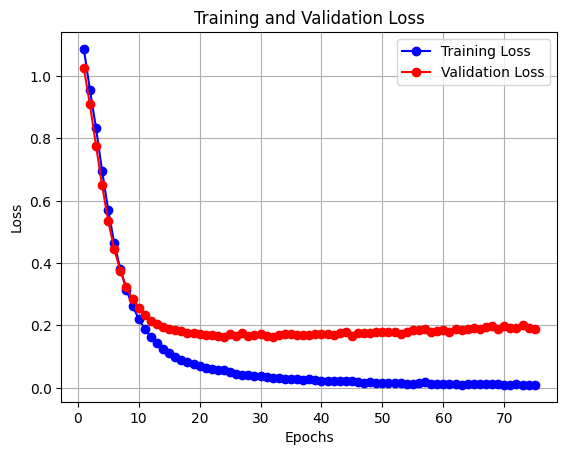

In [70]:
loss_curve_plot(train_loss, val_loss)

In [71]:
model_2, train_loss_2, val_loss_2 = define_model(
    model_type='optimized',
    optimizer_name='adam',
    input_dim=X_train_scaled.shape[1],
    X_train=X_train_scaled,
    y_train=y_train_cat,
    X_val=X_val_scaled,
    y_val=y_val_cat
)


Epoch 1/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 15ms/step - accuracy: 0.2347 - loss: 1.1282 - val_accuracy: 0.3600 - val_loss: 1.0737
Epoch 2/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4127 - loss: 1.0672 - val_accuracy: 0.4667 - val_loss: 1.0173
Epoch 3/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5469 - loss: 1.0002 - val_accuracy: 0.5900 - val_loss: 0.9329
Epoch 4/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6655 - loss: 0.9094 - val_accuracy: 0.7267 - val_loss: 0.8024
Epoch 5/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7356 - loss: 0.7734 - val_accuracy: 0.7800 - val_loss: 0.6667
Epoch 6/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7918 - loss: 0.6277 - val_accuracy: 0.8200 - val_loss: 0.5580
Epoch 7/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8163 - loss: 0.5564 - val_accuracy: 0.8533 - val_loss: 0.4682
Epoch 8/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8834 - loss: 0.4265 - val_accuracy: 0.8733 - val_loss

In [72]:
nn2_preds = model_2.predict(X_val_scaled)
nn2_preds_classes = np.argmax(nn2_preds, axis=1)

joblib.dump(model_2, 'saved_models/model2.keras')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


['saved_models/model2.keras']

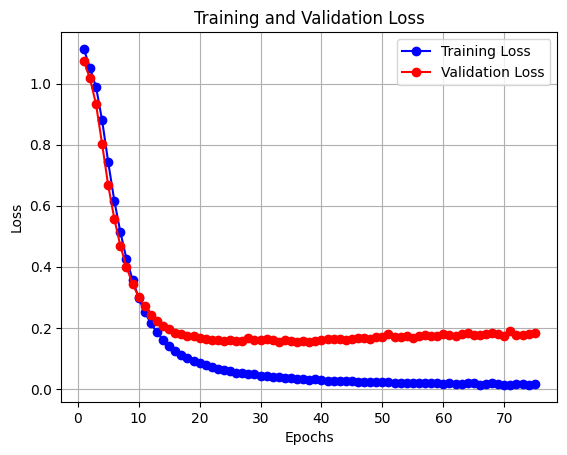

In [73]:
loss_curve_plot(train_loss_2, val_loss_2)

# SECTION 2: Optimization and Regularization Combinations
At this point you should now create models that combine various optimization techniques
As done before make sure to plot out the loss curve and the accuracy and loss in verbose

In [74]:
model_3, train_loss_3, val_loss_3 = define_model(
    model_type='optimized',
    optimizer_name='RMSprop',
    input_dim=X_train_scaled.shape[1],
    learning_rate=0.0005,
    dropout_rate=0.2,
    use_early_stopping=True,
    X_train=X_train_scaled,
    y_train=y_train_cat,
    X_val=X_val_scaled,
    y_val=y_val_cat
)


Epoch 1/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4224 - loss: 1.1298 - val_accuracy: 0.5100 - val_loss: 0.9898
Epoch 2/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4018 - loss: 1.0766 - val_accuracy: 0.5667 - val_loss: 0.9357
Epoch 3/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4734 - loss: 1.0273 - val_accuracy: 0.6233 - val_loss: 0.8876
Epoch 4/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5040 - loss: 0.9738 - val_accuracy: 0.6767 - val_loss: 0.8506
Epoch 5/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5664 - loss: 0.9195 - val_accuracy: 0.7233 - val_loss: 0.8083
Epoch 6/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5479 - loss: 0.9484 - val_accuracy: 0.7533 - val_loss: 0.7733
Epoch 7/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5220 - loss: 0.9242 - val_accuracy: 0.7900 - val_loss: 0.7410
Epoch 8/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5578 - loss: 0.8671 - val_accuracy: 0.7967 - val_loss

In [75]:
nn3_preds = model_3.predict(X_val_scaled)
nn3_preds_classes = np.argmax(nn3_preds, axis=1)

joblib.dump(model_3, 'saved_models/model3.keras')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


['saved_models/model3.keras']

In [76]:
model_4, train_loss_4, val_loss_4 = define_model(
    model_type='optimized',
    optimizer_name='adam',
    input_dim=X_train_scaled.shape[1],
    dropout_rate=0.2,
    use_early_stopping=True,
    X_train=X_train_scaled,
    y_train=y_train_cat,
    X_val=X_val_scaled,
    y_val=y_val_cat
)


Epoch 1/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3082 - loss: 1.1173 - val_accuracy: 0.4300 - val_loss: 1.0587
Epoch 2/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.3709 - loss: 1.0859 - val_accuracy: 0.4833 - val_loss: 1.0268
Epoch 3/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4363 - loss: 1.0226 - val_accuracy: 0.5067 - val_loss: 0.9867
Epoch 4/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4495 - loss: 1.0210 - val_accuracy: 0.5333 - val_loss: 0.9417
Epoch 5/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4530 - loss: 0.9670 - val_accuracy: 0.5433 - val_loss: 0.8875
Epoch 6/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4924 - loss: 0.9356 - val_accuracy: 0.5800 - val_loss: 0.8268
Epoch 7/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5482 - loss: 0.8777 - val_accuracy: 0.6867 - val_loss: 0.7600
Epoch 8/75
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5743 - loss: 0.8411 - val_accuracy: 0.7667 - val_loss

In [77]:
nn4_preds = model_4.predict(X_val_scaled)
nn4_preds_classes = np.argmax(nn4_preds, axis=1)

joblib.dump(model_4, 'saved_models/model4.keras')

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


['saved_models/model4.keras']

# Evaluation

In [78]:
def evaluate_model(name, y_true, y_pred):
    print(f"<=== {name} ===>")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print("\n")

In [79]:
evaluate_model("Logistic Regression", y_valid, logreg_preds)
evaluate_model("SVM", y_valid, svm_preds)
evaluate_model("XGBoost", y_valid, xgb_preds)
evaluate_model("NN Instance 1", y_valid, nn1_preds_classes)
evaluate_model("NN Instance 2", y_valid, nn2_preds_classes)
evaluate_model("NN Instance 3", y_valid, nn3_preds_classes)
evaluate_model("NN Instance 4", y_valid, nn4_preds_classes)


<=== Logistic Regression ===>
Accuracy: 0.9667
F1 Score: 0.9668
Precision: 0.9672
Recall: 0.9667


<=== SVM ===>
Accuracy: 0.8967
F1 Score: 0.8970
Precision: 0.9002
Recall: 0.8967


<=== XGBoost ===>
Accuracy: 0.9567
F1 Score: 0.9566
Precision: 0.9567
Recall: 0.9567


<=== NN Instance 1 ===>
Accuracy: 0.9333
F1 Score: 0.9332
Precision: 0.9332
Recall: 0.9333


<=== NN Instance 2 ===>
Accuracy: 0.9367
F1 Score: 0.9365
Precision: 0.9378
Recall: 0.9367


<=== NN Instance 3 ===>
Accuracy: 0.9467
F1 Score: 0.9464
Precision: 0.9469
Recall: 0.9467


<=== NN Instance 4 ===>
Accuracy: 0.9467
F1 Score: 0.9462
Precision: 0.9505
Recall: 0.9467




#Task: Make Predictions using the best saved model


Create a confusion Matrix and F1 score for both Models. Ensure outputs for the cells are visible

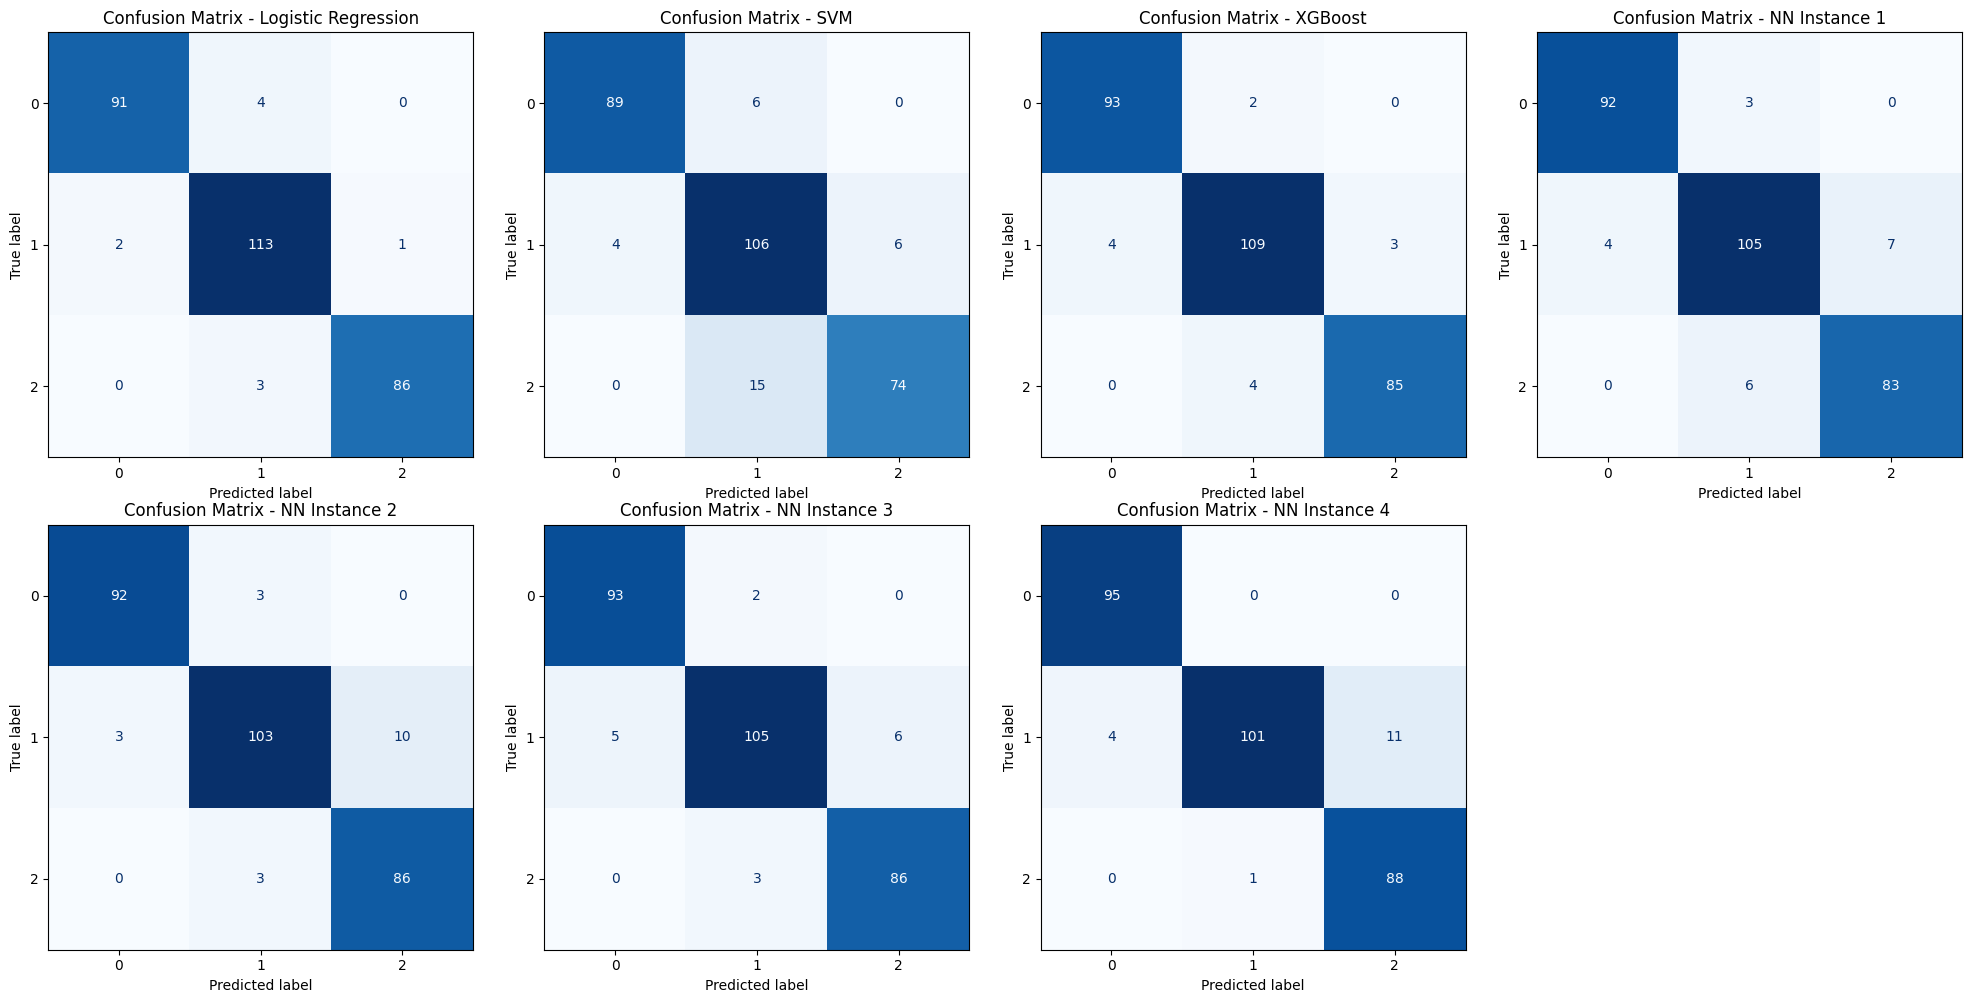

In [80]:

# Define models and predictions
model_preds = {
    "Logistic Regression": logreg_preds,
    "SVM": svm_preds,
    "XGBoost": xgb_preds,
    "NN Instance 1": nn1_preds_classes,
    "NN Instance 2": nn2_preds_classes,
    "NN Instance 3": nn3_preds_classes,
    "NN Instance 4": nn4_preds_classes,
}

# Set up subplots (adjust rows and cols as needed)
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

# Plot each confusion matrix
for i, (title, preds) in enumerate(model_preds.items()):
    cm = confusion_matrix(y_valid, preds)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i], cmap='Blues', colorbar=False)
    axes[i].set_title(f"Confusion Matrix - {title}")

# Hide any extra subplot (if any)
for j in range(len(model_preds), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Finally, Make predictions using the best model. By the time you get to this cell you may realise at some point you needed to save the model so that you cal load it later

In [81]:

def make_predictions(model_path, X):
    # Determine model type by file extension
    ext = os.path.splitext(model_path)[-1].lower()

    if ext in ['.h5', '.keras']:
        model = load_model(model_path)
        predictions = model.predict(X)
    elif ext == '.pkl':
        import joblib
        model = joblib.load(model_path)
        predictions = model.predict_proba(X)  # for classification
    else:
        raise ValueError("Unsupported model file extension: {}".format(ext))

    # For Keras models, predictions may be probabilities or logits
    if ext in ['.h5', '.keras']:
        predicted_labels = np.argmax(predictions, axis=1)
    else:  # For sklearn, usually the predicted class is output by predict(), probabilities by predict_proba()
        predicted_labels = np.argmax(predictions, axis=1)

    # If predictions are for multiple samples, handle accordingly
    support_categories = []
    for label in predicted_labels:
        if label == 0:
            category = "At Risk"
        elif label == 1:
            category = "Average"
        else:
            category = "High Achiever"
        support_categories.append(category)

    # For multiple samples, return as a list
    result = []
    for label, category in zip(predicted_labels, support_categories):
        result.append(f"Predicted Class is {label}, which means the student is {category}")

    # Return a string if single sample, else list of strings
    return result[0] if len(result) == 1 else result

In [82]:
new_data = pd.DataFrame([{
    'gender': 1,  # or 0 if encoded
    'lunch': 0,
    'test preparation course': 0,
    'math score': 85,
    'reading score': 60,
    'writing score': 88,
    'race/ethnicity_group B': 0,
    'race/ethnicity_group C': 1,
    'race/ethnicity_group D': 0,
    'race/ethnicity_group E': 0,
    "parental level of education_bachelor's degree": 0,
    "parental level of education_high school": 1,
    "parental level of education_master's degree": 0,
    "parental level of education_some college": 0,
    "parental level of education_some high school": 0,
}])

# Apply same scaler
new_data_scaled = scaler.transform(new_data)



In [83]:
model_path = '/content/saved_models/logreg.pkl'
make_predictions(model_path, new_data_scaled)

'Predicted Class is 2, which means the student is High Achiever'

Congratulations!!
